In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import vectorbtpro as vbt
import warnings
warnings.filterwarnings('ignore')

from utils.db_utils import QUERY
from analysis.stats import run_monte_carlo_simulation, run_block_bootstrap, calculate_block_bootstrap_performance_metrics
from helper import plot_overall_performance_metrics, plot_in_sample_vs_out_of_sample_sharpe_ratios, plot_bootstrapped_sharpe_sortino_calmar_ratios, plot_bootstrapped_drawdowns

In [10]:
btc = QUERY(
    """
    SELECT 
        time_period_end,
        close
    FROM market_data.ml_features
    WHERE
        asset_id_base = 'BTC' AND
        asset_id_quote = 'USDT' AND
        exchange_id = 'BINANCE'
    ORDER BY time_period_end
    """
).set_index('time_period_end')

In [11]:
symbol_ids = QUERY(
"""
SELECT DISTINCT symbol_id
FROM backtest.backtest_results
ORDER BY symbol_id
"""
)
symbol_ids

,symbol_id
0,PORTFOLIO_UNIVERSE


In [12]:
strats = QUERY(
"""
SELECT DISTINCT strat
FROM backtest.backtest_results
"""
)
strats

,strat
0,PortfolioMLStrategy


In [13]:
symbol_id = 'PORTFOLIO_UNIVERSE'
strat = 'PortfolioMLStrategy'

In [14]:
all_metrics = QUERY(
    f"""
    SELECT *
    FROM backtest.backtest_results
    WHERE
        strat = '{strat}'
    """
)


In [15]:
trades_data = QUERY(
    f"""
    SELECT *
    FROM backtest.backtest_trades
    WHERE
--         symbol_id = '{symbol_id}' AND
        strat = '{strat}'
    """
)

In [16]:
strategy_equity_curve = QUERY(
    f"""
    SELECT *
    FROM backtest.backtest_equity_curves
    WHERE
        symbol_id = '{symbol_id}' AND
        strat = '{strat}'
    ORDER BY date
    """
).set_index('date')

In [19]:
monte_carlo_metrics = run_monte_carlo_simulation(trades_data, strategy_equity_curve, 10_000)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [28]:
monte_carlo_metrics

,avg_pnl,avg_pnl_pct,expectancy,win_rate
0,-12.768725,-0.001732,-0.001732,0.438687
1,-37.208858,-0.004922,-0.004922,0.438687
2,2.910000,-0.002344,-0.002344,0.432642
3,-19.395028,-0.003507,-0.003507,0.443869
4,-27.239466,-0.003259,-0.003259,0.435233
...,...,...,...,...
9995,25.978106,0.000724,0.000724,0.469775
9996,1.338978,-0.000512,-0.000512,0.452504
9997,9.500598,-0.000755,-0.000755,0.462003
9998,29.730606,-0.001828,-0.001828,0.441278


In [ ]:
monte_carlo_metrics['avg_pnl'].hist(bins = 100, color = 'purple', figsize = (10, 5), density = True)
plt.title('Distribution of PnL')
plt.xlabel('PnL')
plt.grid()
plt.tight_layout();

monte_carlo_metrics['avg_pnl_pct'].hist(bins = 100, color = 'purple', figsize = (10, 5), density = True)
plt.title('Distribution of PnL %')
plt.xlabel('PnL %')
plt.grid()
plt.tight_layout();

monte_carlo_metrics['expectancy'].hist(bins = 100, color = 'purple', figsize = (10, 5), density = True)
plt.title('Distribution of Expectancy')
plt.xlabel('Expectancy')
plt.grid()
plt.tight_layout();

monte_carlo_metrics['win_rate'].hist(bins = 100, color = 'purple', figsize = (10, 5), density = True)
plt.title('Distribution of Win Rate')
plt.xlabel('Win Rate')
plt.grid()
plt.tight_layout();

In [20]:
bb = run_block_bootstrap(strategy_equity_curve, 10_000)
bb_metrics = calculate_block_bootstrap_performance_metrics(bb)

Median Sharpe Ratio: 1.30
Median Sortino Ratio: 2.06
Median Calmar Ratio: 1.65

Probability of Sharpe Ratio >= 1: 1.00
Probability of Sortino Ratio >= 1: 1.00
Probability of Calmar Ratio >= 1: 1.00


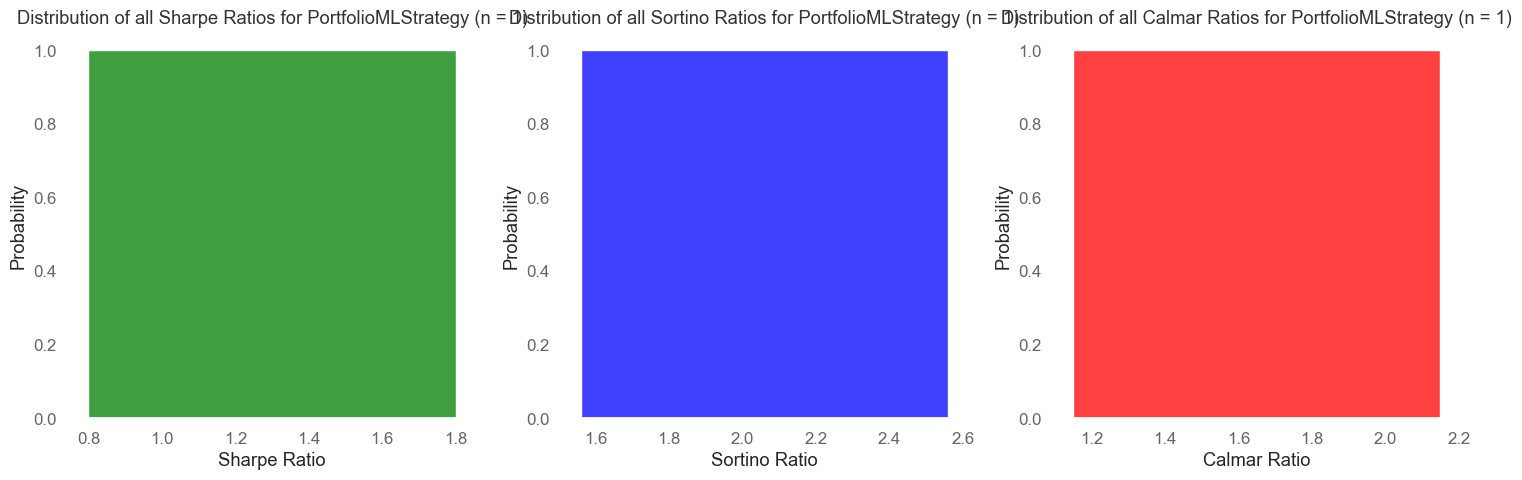

In [23]:
plot_overall_performance_metrics()

In [23]:
plot_in_sample_vs_out_of_sample_sharpe_ratios()

TypeError: plot_in_sample_vs_out_of_sample_sharpe_ratios() missing 2 required positional arguments: 'all_metrics' and 'strat'

In [24]:
# Win Rate
win_rate = (trades_data['pnl_pct'] > 0).mean()
print(f'Win Rate: {win_rate:.4f}')

# Number of Trades
n_trades = len(trades_data)
print(f'Number of Trades: {n_trades}')

# Expectancy (Average PnL %)
expectancy = trades_data['pnl_pct'].mean()
print(f'Expectancy: {expectancy:.4f}')

Win Rate: 0.4499
Number of Trades: 1158
Expectancy: -0.0003


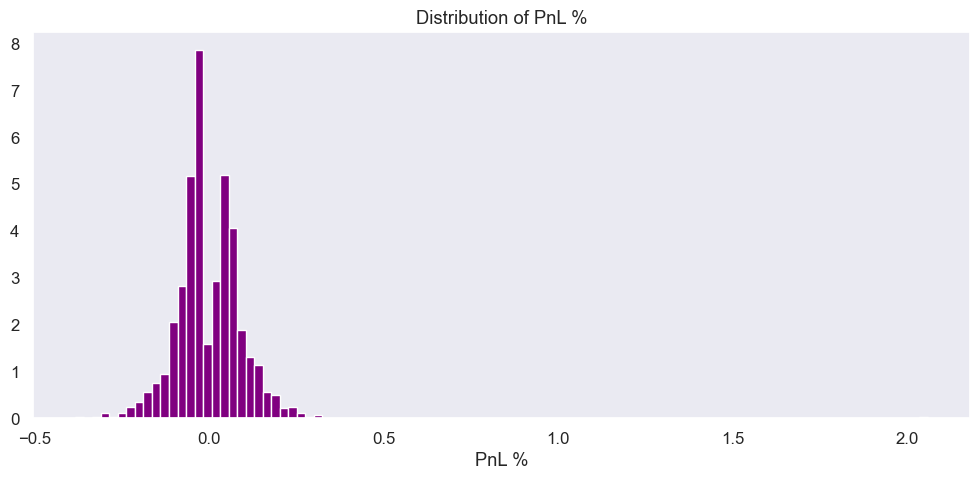

In [25]:
trades_data['pnl_pct'].hist(bins = 100, color = 'purple', figsize = (10, 5), density = True)
plt.title('Distribution of PnL %')
plt.xlabel('PnL %')
plt.grid()
plt.tight_layout();

In [26]:
plot_bootstrapped_sharpe_sortino_calmar_ratios(

TypeError: plot_bootstrapped_sharpe_sortino_calmar_ratios() missing 1 required positional argument: 'monte_carlo_risk_metrics'

Risk of Ruin: 1.00

Median Avg. Drawdown: -44.30%
Median Max Drawdown: -88.36%

95% Confidence Interval for Avg. Drawdown: [-80.7162639 -15.2143882]
95% Confidence Interval for Max Drawdown: [-98.79296419 -68.87825035]


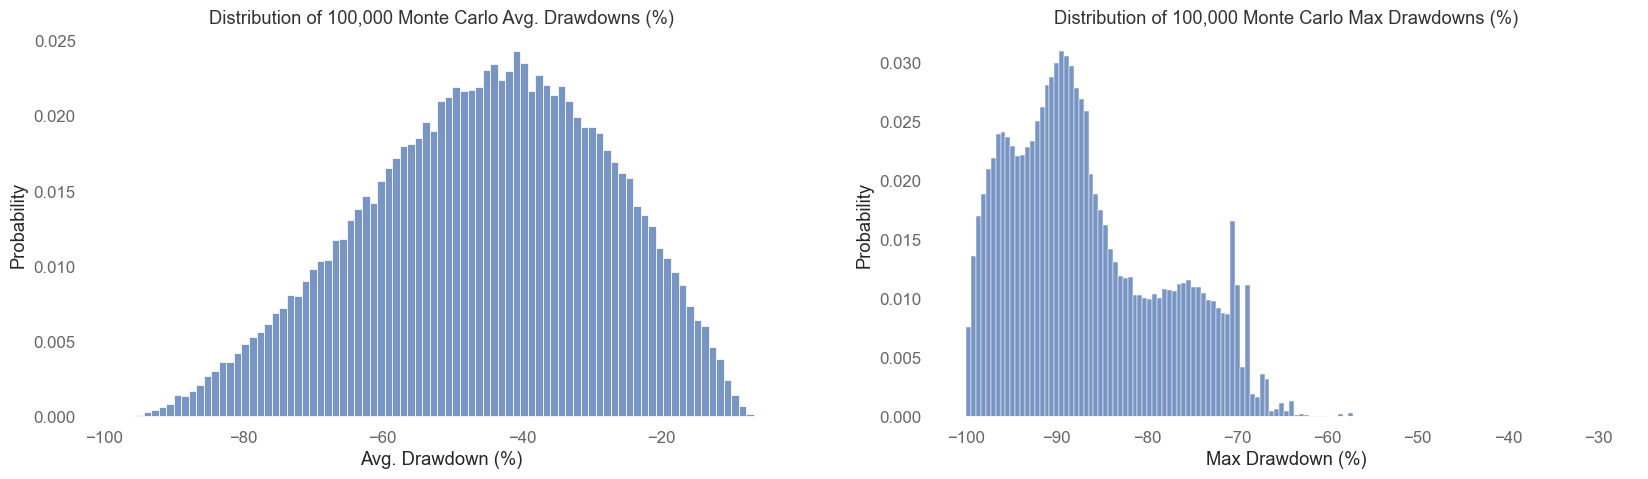

In [69]:
plot_bootstrapped_drawdowns()